# <font color='pink'><b>GRIP : The Sparks Foundation
    
## <font color='maroon'><b>TASK2 : Unsupervised ML Task

    
## <font color='green'><b>Name : POTLACHERVU SRILATHA

## <font color='blue'><b>BATCH NAME : GRIPJUNE2023

    

## <font color='green'><b>To Explore Unsupervised Machine Learning:K-Means Clustering
    
In this task,we will use the iris dataset,to predict the optimum number of cluster

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets


In [2]:
df = pd.read_csv('Iris (1).csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

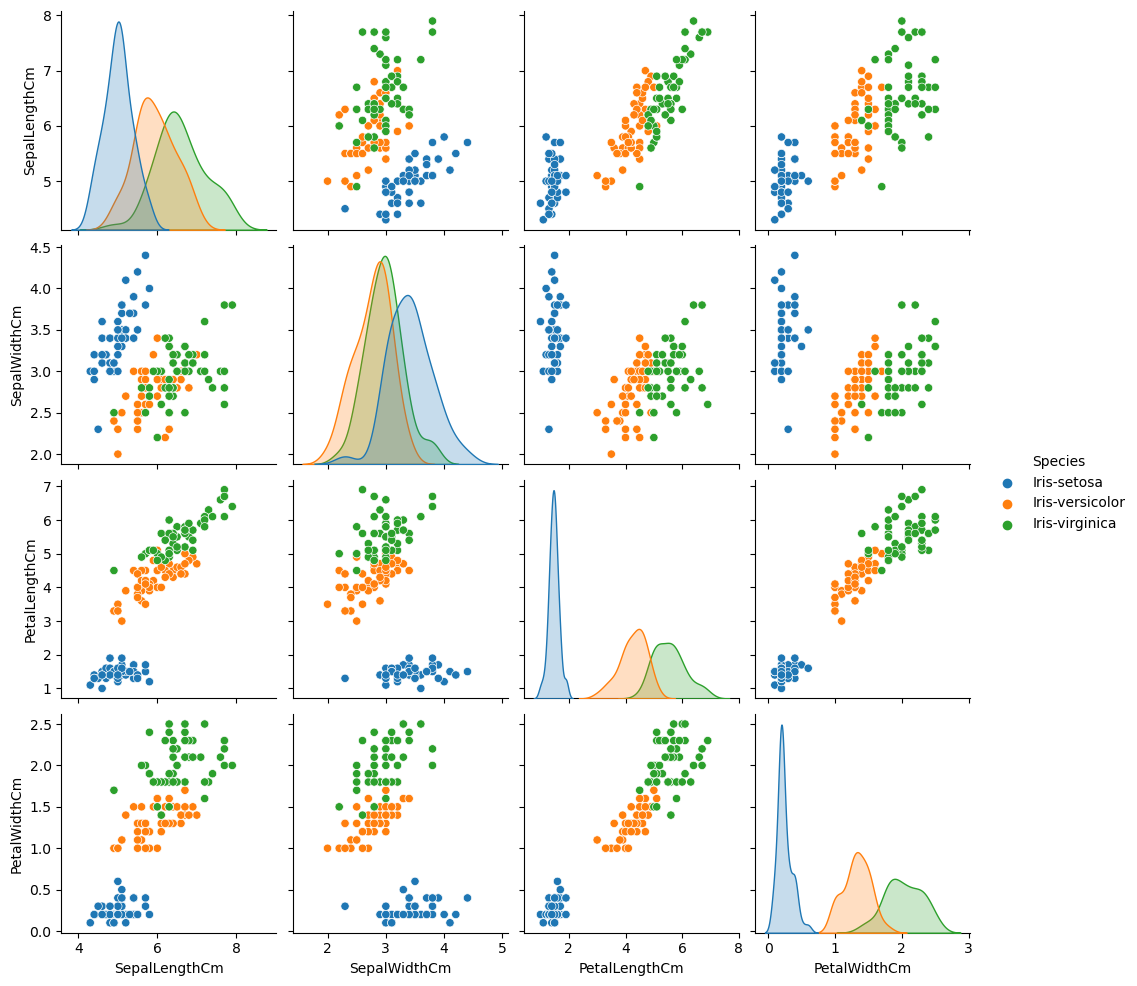

In [11]:
sns.pairplot(data=df,vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],hue='Species')
plt.show()

In [12]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).dtypes.index


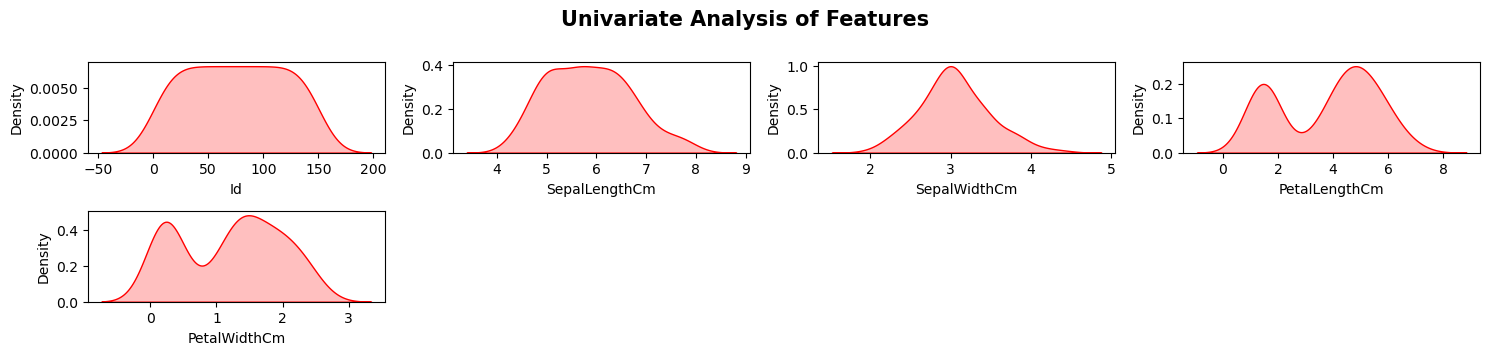

In [13]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_cols)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_cols[i]],shade=True,color='red')
    plt.tight_layout()
plt.show()

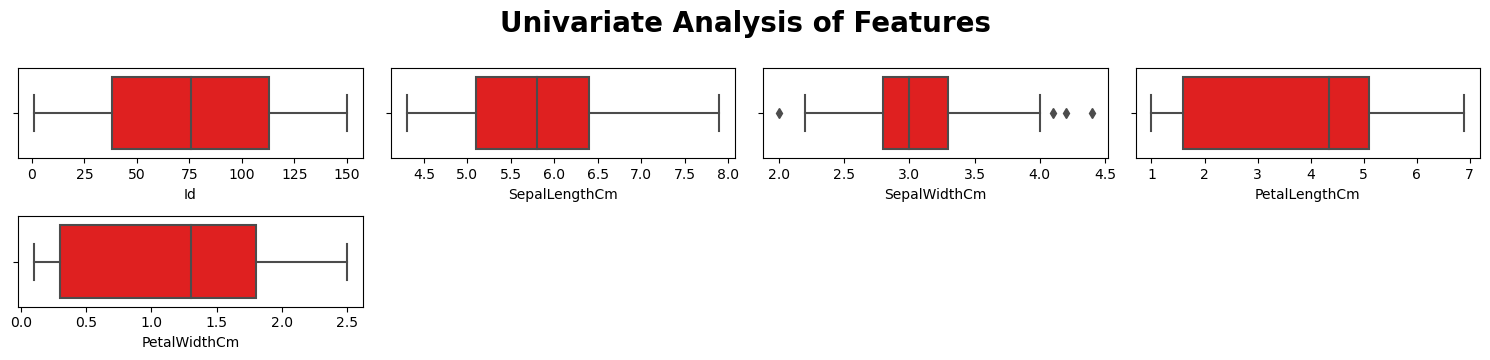

In [14]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_cols)):
    plt.subplot(10,4,i+1)
    sns.boxplot(data=df,x=num_cols[i],color='red')
    plt.xlabel(num_cols[i])
    plt.tight_layout()
plt.show()

In [15]:
def remove_outliers(in_df, in_cols):
    
    first_quartile = in_df[in_cols].quantile(0.25)
    third_quartile = in_df[in_cols].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_df.loc[(in_df[in_cols] > upper_limit), in_cols] = upper_limit
    in_df.loc[(in_df[in_cols] < lower_limit), in_cols] = lower_limit    
    return in_df

In [16]:
for features in num_cols:
    df = remove_outliers(df,features)

In [17]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]


In [18]:
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [19]:
k_means.fit_predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss = []

for i in range(1,11):
    k_means = KMeans(n_clusters=i+3)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [22]:
wcss

[56.40796250000001,
 45.629232051282045,
 38.29706675337547,
 33.64297684087251,
 29.27010591421463,
 27.478380824246113,
 25.93463400096282,
 24.69012193985565,
 22.852165517961573,
 21.28886348997219]

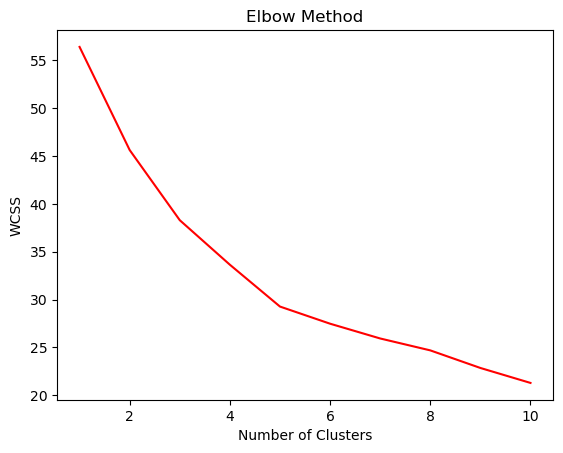

In [23]:
plt.plot(range(1,11),wcss,color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
k_means = KMeans(n_clusters=3,random_state=2)
y_means = k_means.fit_predict(X)
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

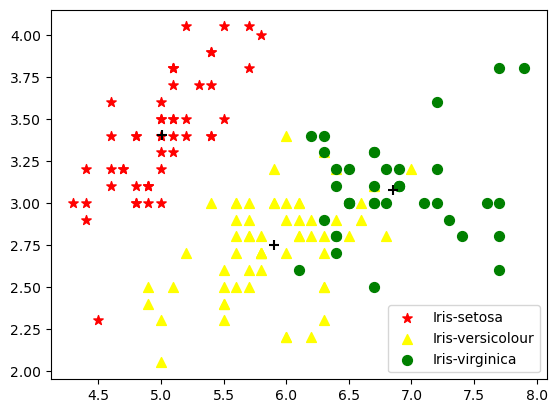

In [25]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50,color='red',label='Iris-setosa',marker='*')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50,color='yellow',label='Iris-versicolour',marker='^')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50,color='green',label='Iris-virginica',marker='o')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=50,color='black',marker='+')
plt.legend()
plt.show()